This notebook will contain non-nodal results, ideally comparing the networks of the ASD population against the neurotypical.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
data = pd.read_csv("master_data_cc400.csv")

filtered_data = data[data['Age'] >= 18]
filtered_data = filtered_data[filtered_data['Age'] <= 30]

filtered_data_asd = filtered_data[filtered_data['DX_Group'] == 1]
filtered_data_nt = filtered_data[filtered_data['DX_Group'] == 2]

condensed_df_asd = filtered_data_asd.drop_duplicates(subset=["Participant ID"], keep="first")
condensed_df_nt = filtered_data_nt.drop_duplicates(subset=["Participant ID"], keep="first")
print(len(condensed_df_asd))
print(len(condensed_df_nt))

# filtered_data_asd = 


print(filtered_data_nt['Age'].mean())



55
74
21.63763636363636


__Phenotypic Demographics__

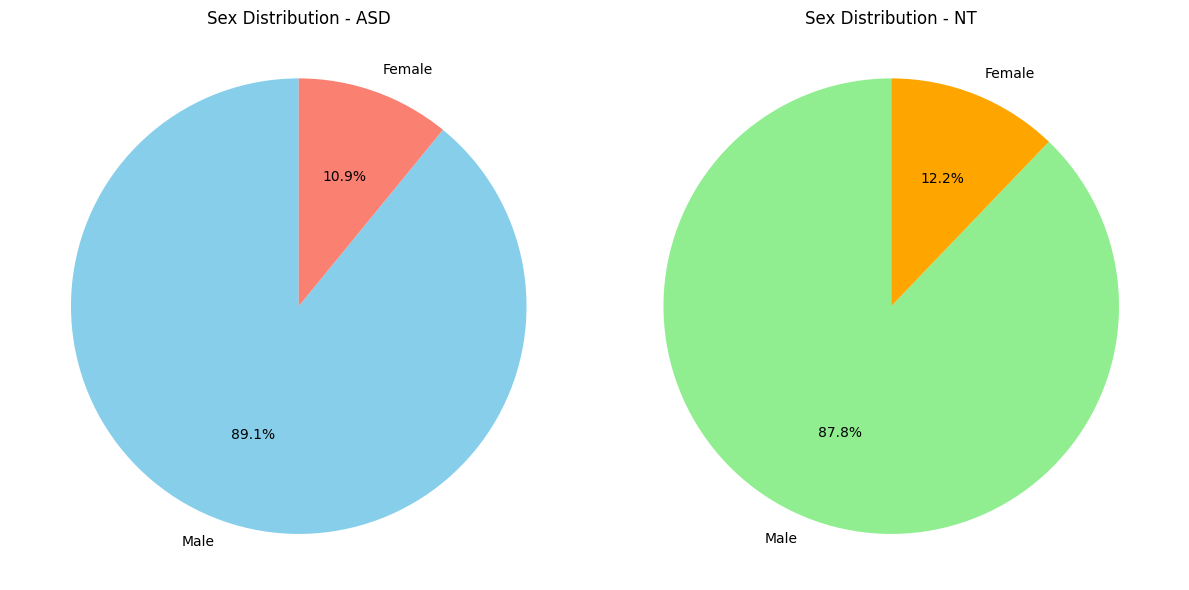

In [102]:
# Example data (you already have these)
sex_asd = filtered_data_asd['Sex'].tolist()
sex_nt = filtered_data_nt['Sex'].tolist()

# Count males and females (1.0 is male, 2.0 is female)
sex_count_asd = {1.0: sex_asd.count(1.0), 2.0: sex_asd.count(2.0)}
sex_count_nt = {1.0: sex_nt.count(1.0), 2.0: sex_nt.count(2.0)}

# Prepare the labels and values for each pie chart
labels = ['Male', 'Female']
sizes_asd = [sex_count_asd[1.0], sex_count_asd[2.0]]
sizes_nt = [sex_count_nt[1.0], sex_count_nt[2.0]]

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Pie chart for ASD
axes[0].pie(sizes_asd, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Sex Distribution - ASD')

# Pie chart for NT
axes[1].pie(sizes_nt, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Sex Distribution - NT')

# Show the plots
plt.tight_layout()
plt.show()

__Global Efficiency__

Text(0, 0.5, 'Global Efficiency')

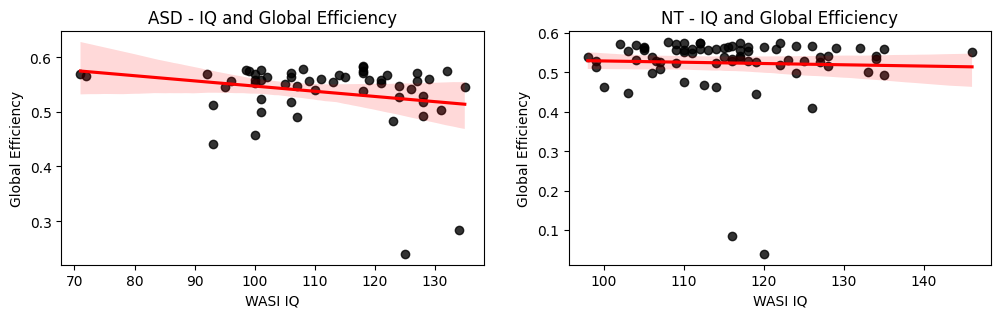

In [110]:
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])  # 2 rows, 2 columns, adjust ratios as needed

ax1 = fig.add_subplot(gs[0, 0])

p = sns.regplot(x='IQ', y='Global Efficiency', data=condensed_df_asd, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax1, fit_reg=True)

ax1.set_title("ASD - IQ and Global Efficiency")
ax1.set_xlabel("WASI IQ")
ax1.set_ylabel("Global Efficiency")

ax2 = fig.add_subplot(gs[0, 1])
sns.regplot(x='IQ', y='Global Efficiency', data=condensed_df_nt, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax2, fit_reg=True)
ax2.set_title("NT - IQ and Global Efficiency")
ax2.set_xlabel("WASI IQ")
ax2.set_ylabel("Global Efficiency")


__Average Clustering__

Text(0, 0.5, 'Average Clustering')

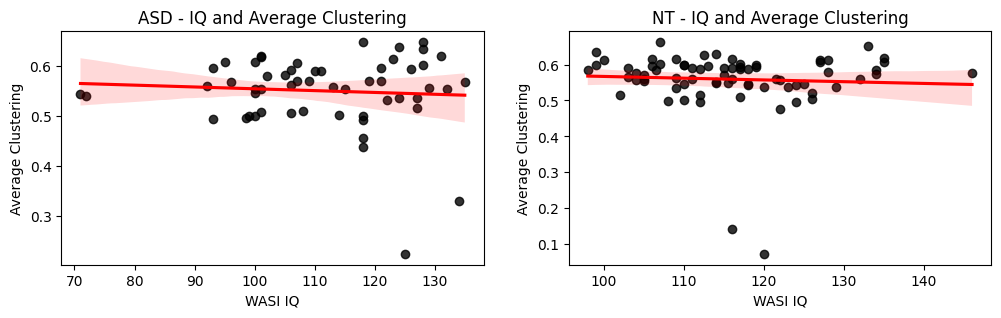

In [23]:
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])  # 2 rows, 2 columns, adjust ratios as needed

ax1 = fig.add_subplot(gs[0, 0])

p = sns.regplot(x='IQ', y='Average Clustering', data=condensed_df_asd, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax1, fit_reg=True)

ax1.set_title("ASD - IQ and Average Clustering")
ax1.set_xlabel("WASI IQ")
ax1.set_ylabel("Average Clustering")

ax2 = fig.add_subplot(gs[0, 1])
sns.regplot(x='IQ', y='Average Clustering', data=condensed_df_nt, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax2, fit_reg=True)
ax2.set_title("NT - IQ and Average Clustering")
ax2.set_xlabel("WASI IQ")
ax2.set_ylabel("Average Clustering")


__Degree Distribution__

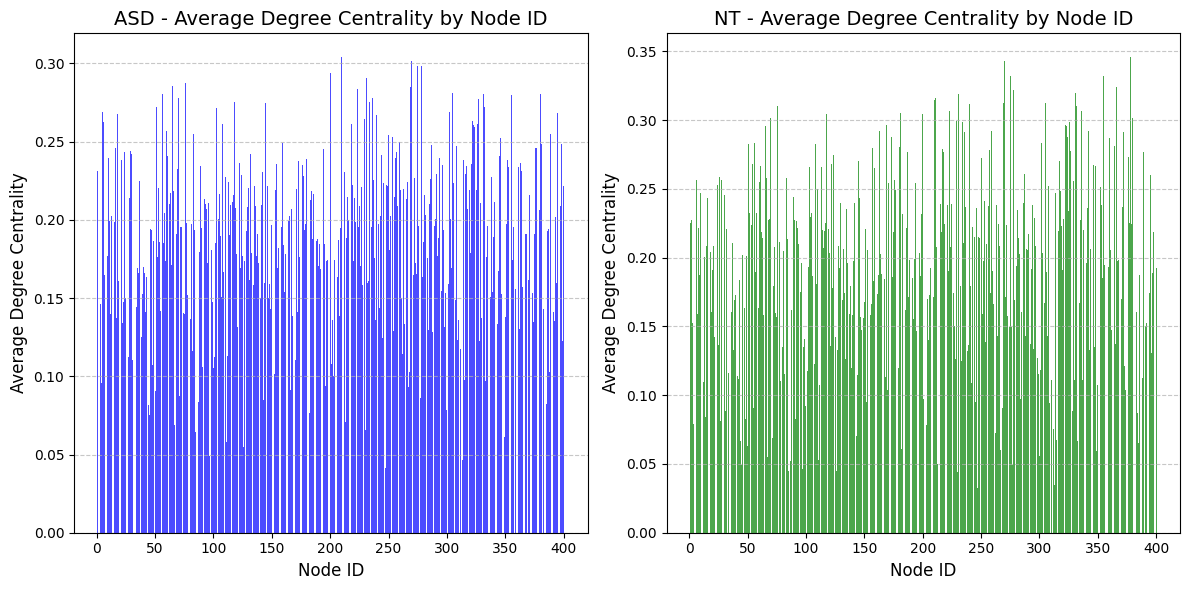

In [27]:
average_degree_centrality_asd = filtered_data_asd.groupby("Node ID")['Degree Centrality'].mean()
average_degree_centrality_nt = filtered_data_nt.groupby("Node ID")['Degree Centrality'].mean()


# Set up the figure with GridSpec
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[1, 1])  # 1 row, 2 columns

# Plot ASD histogram
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(average_degree_centrality_asd.index, average_degree_centrality_asd.values, color='blue', alpha=0.7)
ax1.set_title("ASD - Average Degree Centrality by Node ID", fontsize=14)
ax1.set_xlabel("Node ID", fontsize=12)
ax1.set_ylabel("Average Degree Centrality", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot NT histogram
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(average_degree_centrality_nt.index, average_degree_centrality_nt.values, color='green', alpha=0.7)
ax2.set_title("NT - Average Degree Centrality by Node ID", fontsize=14)
ax2.set_xlabel("Node ID", fontsize=12)
ax2.set_ylabel("Average Degree Centrality", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

__Hubs__

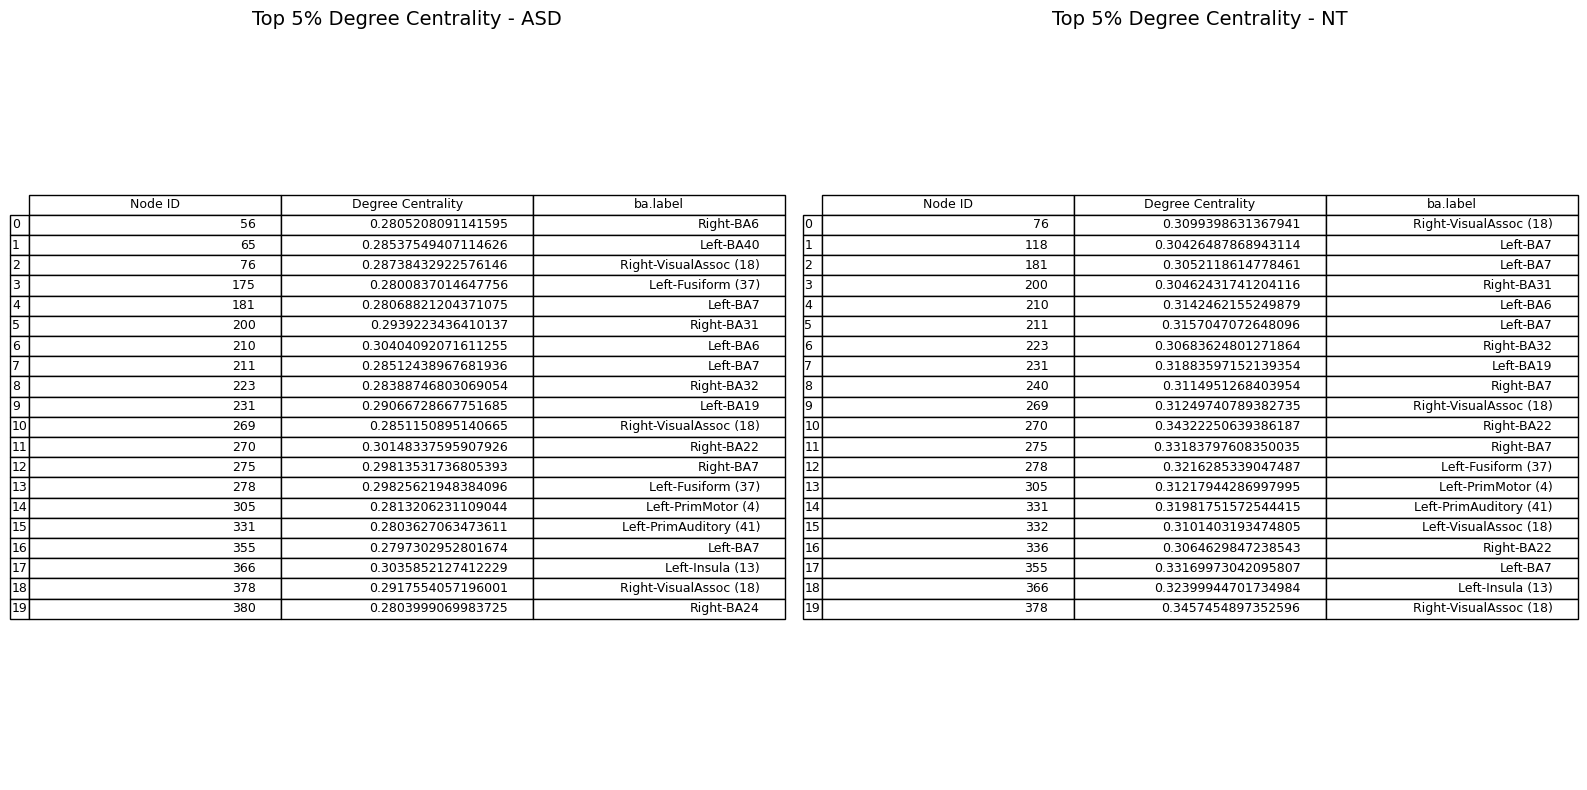

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data_asd' and 'filtered_data_nt' are already defined
average_degree_centrality_asd = filtered_data_asd.groupby("Node ID")['Degree Centrality'].mean()
average_degree_centrality_nt = filtered_data_nt.groupby("Node ID")['Degree Centrality'].mean()

brodmann_df = pd.read_csv("labeled_regions_ba.csv")

# Get top 5% degree centrality values for ASD
top_percent_value_asd = average_degree_centrality_asd.quantile(0.95)
top_percent_df_asd = average_degree_centrality_asd[average_degree_centrality_asd >= top_percent_value_asd]

# Get top 5% degree centrality values for NT (you can change the percentage if needed)
top_percent_value_nt = average_degree_centrality_nt.quantile(0.95)
top_percent_df_nt = average_degree_centrality_nt[average_degree_centrality_nt >= top_percent_value_nt]

top_nodes_asd = list(top_percent_df_asd.to_dict().keys())
top_nodes_nt = list(top_percent_df_nt.to_dict().keys())

# Map BA labels to top nodes (for ASD)
top_nodes_ba_map_asd = {}
for node in top_nodes_asd:
    ba_label_value = brodmann_df[brodmann_df['ROI number'] == node]['ba.label'].iloc[0]
    top_nodes_ba_map_asd[node] = ba_label_value

# Map BA labels to top nodes (for NT)
top_nodes_ba_map_nt = {}
for node in top_nodes_nt:
    ba_label_value = brodmann_df[brodmann_df['ROI number'] == node]['ba.label'].iloc[0]
    top_nodes_ba_map_nt[node] = ba_label_value

# Add the 'ba.label' to the DataFrame (ASD)
top_percent_df_asd = top_percent_df_asd.reset_index()  # Make sure the 'Node ID' becomes a column
top_percent_df_asd['ba.label'] = top_percent_df_asd['Node ID'].map(top_nodes_ba_map_asd)

# Add the 'ba.label' to the DataFrame (NT)
top_percent_df_nt = top_percent_df_nt.reset_index()  # Make sure the 'Node ID' becomes a column
top_percent_df_nt['ba.label'] = top_percent_df_nt['Node ID'].map(top_nodes_ba_map_nt)

# Create subplots with two axes (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Plot the first table (ASD)
axes[0].axis('off')
table_asd = pd.plotting.table(axes[0], top_percent_df_asd, loc='center')

# Plot the second table (NT)
axes[1].axis('off')
table_nt = pd.plotting.table(axes[1], top_percent_df_nt, loc='center')

axes[0].set_title('Top 5% Degree Centrality - ASD', fontsize=14)
axes[1].set_title('Top 5% Degree Centrality - NT', fontsize=14)
# Adjust layout to make sure everything fits well
plt.tight_layout()
plt.show()


__Shared Hubs__

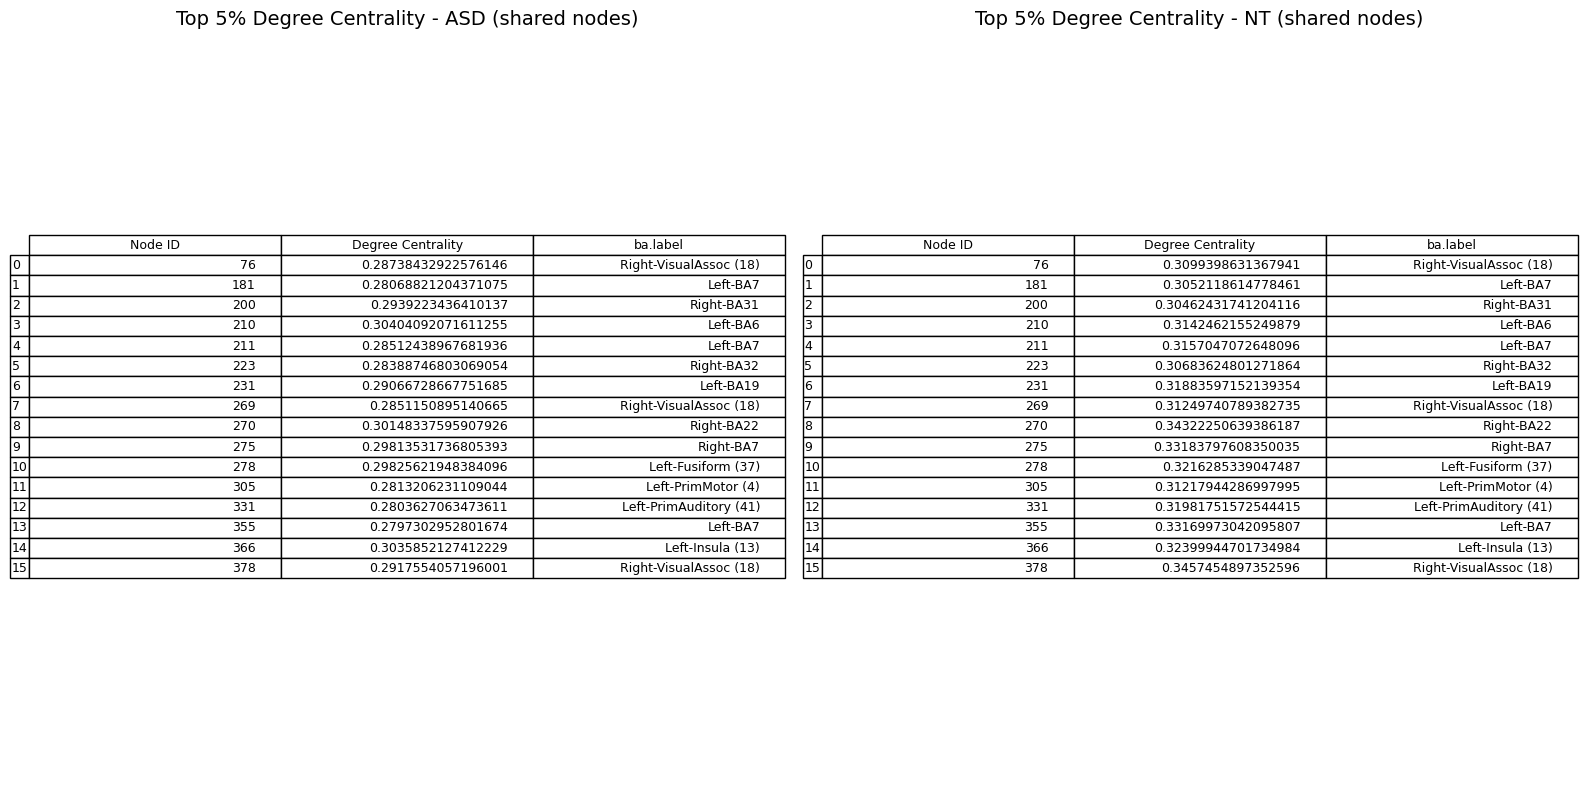

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data_asd' and 'filtered_data_nt' are already defined
average_degree_centrality_asd = filtered_data_asd.groupby("Node ID")['Degree Centrality'].mean()
average_degree_centrality_nt = filtered_data_nt.groupby("Node ID")['Degree Centrality'].mean()

brodmann_df = pd.read_csv("labeled_regions_ba.csv")

# Get top 5% degree centrality values for ASD
top_percent_value_asd = average_degree_centrality_asd.quantile(0.95)
top_percent_df_asd = average_degree_centrality_asd[average_degree_centrality_asd >= top_percent_value_asd]

# Get top 5% degree centrality values for NT (you can change the percentage if needed)
top_percent_value_nt = average_degree_centrality_nt.quantile(0.95)
top_percent_df_nt = average_degree_centrality_nt[average_degree_centrality_nt >= top_percent_value_nt]

# Find common Node IDs between ASD and NT
common_nodes = top_percent_df_asd.index.intersection(top_percent_df_nt.index)

# Filter ASD and NT data to only include common nodes
top_percent_df_asd = top_percent_df_asd.loc[common_nodes]
top_percent_df_nt = top_percent_df_nt.loc[common_nodes]

# Map BA labels to top nodes (for ASD)
top_nodes_ba_map_asd = {}
for node in common_nodes:
    ba_label_value = brodmann_df[brodmann_df['ROI number'] == node]['ba.label'].iloc[0]
    top_nodes_ba_map_asd[node] = ba_label_value

# Map BA labels to top nodes (for NT)
top_nodes_ba_map_nt = {}
for node in common_nodes:
    ba_label_value = brodmann_df[brodmann_df['ROI number'] == node]['ba.label'].iloc[0]
    top_nodes_ba_map_nt[node] = ba_label_value

# Add the 'ba.label' to the DataFrame (ASD)
top_percent_df_asd = top_percent_df_asd.reset_index()  # Make sure the 'Node ID' becomes a column
top_percent_df_asd['ba.label'] = top_percent_df_asd['Node ID'].map(top_nodes_ba_map_asd)

# Add the 'ba.label' to the DataFrame (NT)
top_percent_df_nt = top_percent_df_nt.reset_index()  # Make sure the 'Node ID' becomes a column
top_percent_df_nt['ba.label'] = top_percent_df_nt['Node ID'].map(top_nodes_ba_map_nt)

# Create subplots with two axes (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Plot the first table (ASD)
axes[0].axis('off')
table_asd = pd.plotting.table(axes[0], top_percent_df_asd, loc='center')

# Plot the second table (NT)
axes[1].axis('off')
table_nt = pd.plotting.table(axes[1], top_percent_df_nt, loc='center')

axes[0].set_title('Top 5% Degree Centrality - ASD (shared nodes)', fontsize=14)
axes[1].set_title('Top 5% Degree Centrality - NT (shared nodes)', fontsize=14)
# Adjust layout to make sure everything fits well
plt.tight_layout()
plt.show()


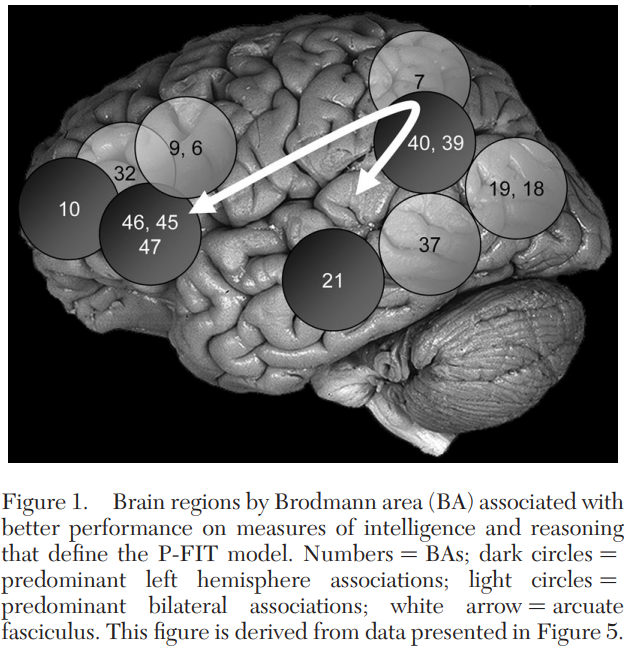

In [54]:
# from nilearn import plotting, datasets, surface
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load a brain mesh
# fsaverage = datasets.fetch_surf_fsaverage()

# # Load the surface coordinates
# pial_left_coords, _ = surface.load_surf_mesh(fsaverage['pial_left'])  # Load the left hemisphere mesh coordinates

# # Example: average degree centrality data for ASD and NT groups
# average_degree_centrality_asd = filtered_data_asd.groupby("Node ID")['Degree Centrality'].mean()
# average_degree_centrality_nt = filtered_data_nt.groupby("Node ID")['Degree Centrality'].mean()

# # Load the ROI mapping CSV
# mni_mapping = pd.read_csv("CC400_ROI_labels.csv")

# # Function to convert the "center of mass" string to a numeric tuple
# def parse_coordinates(center_of_mass):
#     # Format example: "(-10.5;-49.4;-7.3)"
#     coords = center_of_mass.strip(' ()').split(';')
#     return tuple(map(float, coords))

# # Parse ROI center of mass coordinates
# roi_coordinates = {}
# for _, row in mni_mapping.iterrows():
#     roi_number = row['ROI number']
#     center_of_mass = row[' center of mass']
#     roi_coordinates[roi_number] = parse_coordinates(center_of_mass)

# # Initialize projection arrays for ASD and NT groups
# projection_asd = np.zeros(len(pial_left_coords))
# projection_nt = np.zeros(len(pial_left_coords))

# # Assign degree centrality values to the projection for ASD
# for roi_number, degree_centrality in average_degree_centrality_asd.items():
#     if roi_number in roi_coordinates:
#         coord = np.array(roi_coordinates[roi_number])  # Convert to NumPy array for vectorized computation
#         distances = np.linalg.norm(pial_left_coords - coord, axis=1)  # Calculate distances
#         closest_vertex = np.argmin(distances)  # Find the closest vertex
#         projection_asd[closest_vertex] = degree_centrality

# # Assign degree centrality values to the projection for NT
# for roi_number, degree_centrality in average_degree_centrality_nt.items():
#     if roi_number in roi_coordinates:
#         coord = np.array(roi_coordinates[roi_number])
#         distances = np.linalg.norm(pial_left_coords - coord, axis=1)
#         closest_vertex = np.argmin(distances)
#         projection_nt[closest_vertex] = degree_centrality

# # Plotting the degree centrality on the brain surface for ASD and NT
# fig = plt.figure(figsize=(16, 8))

# # Create 3D axes for each plot
# ax_asd = fig.add_subplot(121, projection='3d')
# ax_nt = fig.add_subplot(122, projection='3d')

# # Plot for ASD group
# plotting.plot_surf_stat_map(
#     fsaverage['pial_left'], projection_asd, hemi='left', title='ASD Degree Centrality',
#     colorbar=True, axes=ax_asd, threshold=0, cmap='coolwarm'
# )

# # Plot for NT group
# plotting.plot_surf_stat_map(
#     fsaverage['pial_left'], projection_nt, hemi='left', title='NT Degree Centrality',
#     colorbar=True, axes=ax_nt, threshold=0, cmap='coolwarm'
# )

# # Show the plots
# plt.tight_layout()
# plt.show()